# Tutorial 8 - TensorFlow

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_8-TensorFlow/Tutorial_8-TensorFlow.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_8-TensorFlow/Tutorial_8-TensorFlow.ipynb)

<a id='top'></a>

This tutorial is adapted from a 2022 blog post on the website [Made With ML](https://madewithml.com/), by Goku Mohandas.

We will import `TensorFlow` and `numpy` and set the seed for their random number generators for reproducibility.

In [1]:
import numpy as np
import tensorflow as tf 


print(f'TF version: {tf.__version__ }')

TF version: 2.14.0


In [2]:
SEED = 1

In [3]:
# Set seed for reproducability
np.random.seed(seed=SEED)
tf.random.set_seed(seed=SEED)

## TensorFlow Basics

First, we will cover some basics such as creating TensorFlow tensors and converting from common data structures to TensorFlow tensors.

In [4]:
x = tf.random.normal((2, 3))
print(f'Type: {x.dtype}')
print(f'shape: {x.shape}')
print(f'values:\n{x}')

Type: <dtype: 'float32'>
shape: (2, 3)
values:
[[-1.1012203   1.5457517   0.383644  ]
 [-0.87965786 -1.2246722  -0.9811211 ]]


In [5]:
# Zeros and ones tensors
x = tf.zeros((2, 3), dtype=tf.float64)
print(x)
x = tf.ones((2, 3))
print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float64)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [6]:
# List => Tensor
x = tf.constant([[1, 2, 3], 
                  [4, 5, 6]])

print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
[[1 2 3]
 [4 5 6]]


In [7]:
# Numpy array => Tensor
x = tf.constant(np.random.rand(2, 3))
print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]]


### Operations

In [8]:
# Addition
x = tf.random.normal((2, 3))
y = tf.random.normal((2, 3))
z = x + y
print(f'shape: {z.shape}')
print(f'values:\n{z}')

shape: (2, 3)
values:
[[-0.05392435 -1.4948881   0.6654824 ]
 [ 0.4435789   1.0243716   0.5050061 ]]


In [9]:
# Dot product
x = tf.random.normal((2, 3))
y = tf.random.normal((3, 2))
z = tf.matmul(x, y)
print(f'shape: {z.shape}')
print(f'values:\n{z}')

shape: (2, 2)
values:
[[ 2.04325     1.1587756 ]
 [-1.8957058  -0.67201185]]


In [10]:
# Transpose
x = tf.random.normal((2, 3))
print(f"shape: {x.shape}")
print(f"values: \n{x}")
y = tf.transpose(x)
print(f"shape: {y.shape}")
print(f"values: \n{y}")

shape: (2, 3)
values: 
[[-1.1771783  -0.90325946  0.8419609 ]
 [-0.06870949 -0.96161884 -0.51533026]]
shape: (3, 2)
values: 
[[-1.1771783  -0.06870949]
 [-0.90325946 -0.96161884]
 [ 0.8419609  -0.51533026]]


In [11]:
# Reshape
x = tf.random.normal((2, 3))
z = tf.reshape(x, (3, 2))
print(f"shape: {z.shape}")
print(f"values: \n{z}")

shape: (3, 2)
values: 
[[-0.00839665  0.12513153]
 [-1.0209956   0.28299028]
 [-1.8376423   1.1970675 ]]


In [12]:
# Dangers of reshaping (unintended consequences)
x = tf.constant([
    [[1,1,1,1], [2,2,2,2], [3,3,3,3]],
    [[10,10,10,10], [20,20,20,20], [30,30,30,30]]
])
print(f"shape: {x.shape}")
print(f"x: \n{x}\n")

a = tf.reshape(x, (x.shape[1], -1))
print(f"\nshape: {a.shape}")
print(f"a: \n{a}\n")

b = tf.transpose(x, perm=[1, 0, 2])
print(f"\nshape: {b.shape}")
print(f"b: \n{b}\n")

c = tf.reshape(b, (b.shape[0], -1))
print(f"\nshape: {c.shape}")
print(f"c: \n{c}")

shape: (2, 3, 4)
x: 
[[[ 1  1  1  1]
  [ 2  2  2  2]
  [ 3  3  3  3]]

 [[10 10 10 10]
  [20 20 20 20]
  [30 30 30 30]]]


shape: (3, 8)
a: 
[[ 1  1  1  1  2  2  2  2]
 [ 3  3  3  3 10 10 10 10]
 [20 20 20 20 30 30 30 30]]


shape: (3, 2, 4)
b: 
[[[ 1  1  1  1]
  [10 10 10 10]]

 [[ 2  2  2  2]
  [20 20 20 20]]

 [[ 3  3  3  3]
  [30 30 30 30]]]


shape: (3, 8)
c: 
[[ 1  1  1  1 10 10 10 10]
 [ 2  2  2  2 20 20 20 20]
 [ 3  3  3  3 30 30 30 30]]


In [13]:
# Dimensional operations
x = tf.random.normal((2, 3))
print(f"values: \n{x}")
y = tf.reduce_sum(x, axis=0) # sum over columns
print(f"values: \n{y}")
z = tf.reduce_sum(x, axis=1) # sum over rows
print(f"values: \n{z}")

values: 
[[-0.35975078  1.5145855   0.9998955 ]
 [-0.83270323  0.10627943 -1.6242576 ]]
values: 
[-1.192454    1.6208649  -0.62436205]
values: 
[ 2.1547303 -2.3506813]


### Indexing

Now we will look at how to extract, separate, and join values from tensors.

In [14]:
x = tf.random.normal((3, 4))
print (f"x: \n{x}")
print()
print(f"x[:1]: \n{x[0]}")
print()
print(f"x[:1, 1:3]: \n{x[:1, 1:3]}")


x: 
[[ 0.9868413   0.57056284  0.17946035  0.83900064]
 [ 1.0045967  -0.0642297  -0.6155826  -0.24785912]
 [-1.4076422   0.27217543  0.5191802   0.97026527]]

x[:1]: 
[0.9868413  0.57056284 0.17946035 0.83900064]

x[:1, 1:3]: 
[[0.57056284 0.17946035]]


### Slicing

In [15]:
# Select with dimensional indices
x = tf.random.normal((2, 3))
print(f"values: \n{x}")

col_indices = tf.constant([0, 2])
chosen = tf.gather(x, axis=1, indices=col_indices) # values from column 0 & 2
print(f"values: \n{chosen}")

row_indices = tf.constant([0, 1])
col_indices = tf.constant([0, 2])
chosen = tf.gather_nd(x, indices=[row_indices, col_indices]) # values from (0, 0) & (1, 2)
print(f"values: \n{chosen}")

values: 
[[-0.39749852  1.0979848   1.7348342 ]
 [-0.10556055  0.9014524   0.52277493]]
values: 
[[-0.39749852  1.7348342 ]
 [-0.10556055  0.52277493]]
values: 
[1.0979848 1.7348342]


### Joining

In [16]:
# Concatenation
x = tf.random.normal((2, 3))
print(f"Values: \n{x}")
y = tf.concat([x, x], axis=0) # stack by rows (dim=1 to stack by columns)
print(f"Values: \n{y}")

Values: 
[[-1.87371     0.2745974  -0.03640426]
 [-0.50639224 -0.20166533 -0.7770617 ]]
Values: 
[[-1.87371     0.2745974  -0.03640426]
 [-0.50639224 -0.20166533 -0.7770617 ]
 [-1.87371     0.2745974  -0.03640426]
 [-0.50639224 -0.20166533 -0.7770617 ]]


### Gradients

* $y = 3x + 2$
* $z = \sum{y}/N$
* $\frac{\partial(z)}{\partial(x)} = \frac{\partial(z)}{\partial(y)} \frac{\partial(y)}{\partial(x)} = \frac{1}{N} * 3 = \frac{1}{12} * 3 = 0.25$

In [17]:
# Tensors with gradient book keeping
x = tf.random.normal((3, 4))

# Tensorflow needs graph context to track gradients
with tf.GradientTape() as g:
    g.watch(x)
    y = 3*x + 2
    z = tf.reduce_mean(y)

dz_dx = g.gradient(z, x)

print(dz_dx)

tf.Tensor(
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]], shape=(3, 4), dtype=float32)


### CUDA

This section details how to check if we are able to use GPU to accelerate our machine learning or deep learning models.

The Compute Unified Device Architecture or **CUDA** is a parallel computing platform and API that allows software to use certain types of GPUs for general purpose processing. It is an extension of the C and C++ programming languages.

`TensorFlow` makes using the GPU quite transparent. If the GPU compatible version of TF is installed along with the proper drivers, TF will use the GPU.

Although training is usually faster on the GPU, depending on model size and hardware specs, it can take quite a while to copy the model and your data to the GPU.  

[Link](https://anaconda.org/anaconda/tensorflow-gpu) to metapackage for easily installing `TensorFlow` GPU using a conda 'metapackage'. This is just a special package which installs the required GPU drivers alongside TensorFlow.

In [18]:
# Is CUDA available?
print(tf.test.is_built_with_cuda())

False


In [19]:
# Set device to first gpu (if available)
device = "/gpu:0" if tf.test.is_built_with_cuda() else "cpu"
print(device)

cpu


In [20]:
with tf.device(device):
    a = tf.constant([1, 2, 3])

In [21]:
# Print info about local cpu/gpu devices through tensorflow library
from tensorflow.python.client import device_lib

# The most useful information is found in the first two lines of the output.
# 1st line is name of device (cpu/gpu and number). 
# If there were 2 cpus on the device, there would be another entry in the list under name: '/device:cpu:1'
# The second line give the memory limit in bits. 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7120276819793909368
 xla_global_id: -1]

## Tensorflow Datasets

Public datasets are an important resource for accelerating machine learning research. However, writing custom scripts to fetch and prepare each dataset individually can be tedious. 

**TensorFlow DataSets (TFDS)** handles the tasks of sourcing the data and standardizing it into a consistent format. Furthermore, TFDS utilizes the `tensorflow.data API` to construct high-performance input pipelines that are seamlessly usable with tensorflow.keras models.

### Overview

TFDS is a set of ready-to-use datasets for various machine learning tasks, including Computer Vision datasets, Natural Language Processing datasets, and miscellaneous other datasets for performing Unsupervised Learning, Reinforcement learning, and more.

The entire list of available datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview). 

All of these datasets are contained under the `tensorflow.data.Datasets` module.

`Installing TFDS might cause some dependency issues, it is highly recommended to create a new conda env to work on this task.`

To install TFDS:

    pip install tensorflow-datasets

TFDS is pre-installed in Google Colab, and it can be directly imported as in the next cell.

In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

The following line also displays the list all the available datasets in TFDS.

In [23]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_h',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 

### Load Dataset with TFDS 

The easiest way of loading a dataset with TFDS is with `tfds.load`. 

It will:

1. Download the data and save it as `tfrecord` files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.

In [24]:
(training_data, test_data), info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])

Arguments in `tfds.load` include:

- First argument is the name of dataset.
- param `'split'` controls which split we wish to load (e.g., train, test, or validation).
- param `'shuffle_files'` controls whether or not data is shuffled between each epoch.
- param `'data_dir'` controls where the dataset is saved (defaults to `~/tensorflow_datasets/`).
- param `'with_info'` controls whether or not the metadata for the dataset is included.
- param `'as_supervised'` controls whether or not a tuple `(features, label)` is returned (as opposed to just features).
- param `'download'` controls whether or not the library will attempt to download the dataset.

We can access the dataset metadata with `info` as in the next cell.

In [25]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\vakanski\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

Features metadata can include features shape, label shape, etc.

In [26]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

We can also inspect the number of classes and label names.

In [27]:
print(info.features["label"].num_classes)
print(info.features["label"].names)

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


print(info.features.shape)
print(info.features.np_dtype)
print(info.features['image'].shape)
print(info.features['image'].np_dtype)


### Slicing API for Customized Dataset Split

In [28]:
# Fashion MNIST dataset, get 25% to 75% of train dataset 
ds = tfds.load('mnist', split='train[25%:75%]')

In [29]:
# Get first 4,000 of the data for training
ds = tfds.load('fashion_mnist', split='train[:4000]')

In [30]:
# Get 25% of training and all of the test data
ds = tfds.load('fashion_mnist', split='train[:25%]+test')

### Cross-Validation

In [31]:
vals_ds = tfds.load('fashion_mnist', split=[
    f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)])

trains_ds = tfds.load('fashion_mnist', split=[
    f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)])

In [32]:
# First fold of validation DS
vals_ds_fold1 =vals_ds[0]

### Iterate over the Dataset in Batches

In [33]:
batch_size = 32

for epoch in range(1):
    print(f'epoch {epoch}')   
    n = 0
    for img, label in training_data.batch(batch_size):
        # print the first 10 batches
        while n < 10:
            # notice that img.shape = [batch size, pixels width, pixels heights, channels number)
            # notice that label.shape = 32, therefore 32 labels are shown
            print(f'img: {img.shape}, labels: {label}') 
            # we can train a model here
            n = n+1            

epoch 0
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


### Visualization

In [34]:
# list 5 images and labels from mnist dataset
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(5), info)

image  label
0  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      4
1  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      1
2  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      0
3  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      7
4  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      8

In [35]:
# list 5 images and labels from mnist dataset
tfds.as_dataframe(ds.take(5), info)

image  label
0  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      4
1  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      1
2  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      0
3  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      7
4  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      8

Method 2: `tfds.show_examples` returns a matplotlib figure with data samples and labels (only image datasets are supported with this method).

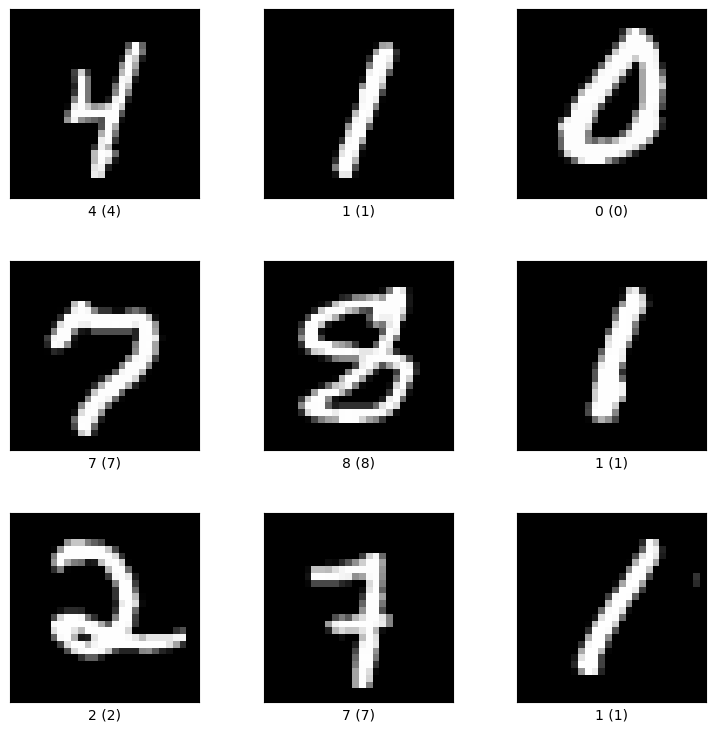

In [36]:
import matplotlib.pyplot as plt

fig = tfds.show_examples(ds, info)

### Create Your Own TFDS with `tf.data.Dataset.from_tensor_slices`

In [37]:
np.random.seed(1)

features = np.random.uniform(0,1, size=(32, 100, 100))
labels = np.random.randint(0, 2, size=(32, 1))

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(5)  

for epoch in range(2):
    for step, (x_batch, y_batch) in enumerate(dataset):
        print(f'step: {step}, x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')
    print()        

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)



### Simple Example of a Pipeline with TFDS in a CNN Model

In [38]:
import tensorflow as tf
import tensorflow_datasets as tfds

# MODEL DEFINITION 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# EXTRACT PHASE 
data = tfds.load('horses_or_humans', split='train', as_supervised=True)
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

# TRANSFORM PHASE 
def augmentimages(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.random_flip_left_right(image)
  return image, label

train = data.map(augmentimages)
train_batches = train.shuffle(100).batch(32)
validation_batches = val_data.batch(32)

# MODEL TRAINING PHASE
history = model.fit(train_batches, epochs=3, 
                    validation_data=validation_batches, validation_steps=1)

Epoch 1/3
33/33 [==============================] - 15s 414ms/step - loss: 3.3552 - accuracy: 0.5151 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 2/3
33/33 [==============================] - 13s 401ms/step - loss: 0.6617 - accuracy: 0.5492 - val_loss: 8.1690 - val_accuracy: 0.4375
Epoch 3/3
33/33 [==============================] - 15s 464ms/step - loss: 0.6275 - accuracy: 0.5628 - val_loss: 4.4311 - val_accuracy: 0.9375


### References:

1. Moroney, L. (n.d.). AI and Machine Learning for Coders. O’Reilly Online Learning. https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html 
2. Tensorflow datasets. TensorFlow. (n.d.). https://www.tensorflow.org/datasets/overview#iterate_over_a_dataset 

[BACK TO TOP](#top)